<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Где-брать-данные?" data-toc-modified-id="Где-брать-данные?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Где брать данные?</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Какие-бывают-значения-рейтинга?" data-toc-modified-id="Какие-бывают-значения-рейтинга?-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Какие бывают значения рейтинга?</a></span></li><li><span><a href="#Добавьте-целевую-переменную" data-toc-modified-id="Добавьте-целевую-переменную-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Добавьте целевую переменную</a></span></li><li><span><a href="#Худший-и-лучший-банк" data-toc-modified-id="Худший-и-лучший-банк-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Худший и лучший банк</a></span></li><li><span><a href="#Отличается-ли-длина-у-хороших-и-плохих-отзывов?" data-toc-modified-id="Отличается-ли-длина-у-хороших-и-плохих-отзывов?-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Отличается ли длина у хороших и плохих отзывов?</a></span></li><li><span><a href="#Отличается-ли-распределение-количества-восклицательных-знаков?" data-toc-modified-id="Отличается-ли-распределение-количества-восклицательных-знаков?-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Отличается ли распределение количества восклицательных знаков?</a></span></li></ul></li></ul></li><li><span><a href="#Бейзлайн-модель-классификации" data-toc-modified-id="Бейзлайн-модель-классификации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Бейзлайн модель классификации</a></span></li><li><span><a href="#Обработка-текста" data-toc-modified-id="Обработка-текста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обработка текста</a></span><ul class="toc-item"><li><span><a href="#Модель-на-словах.-CountVectorizer" data-toc-modified-id="Модель-на-словах.-CountVectorizer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель на словах. CountVectorizer</a></span></li><li><span><a href="#Модель-на-n-gram'ах-символов.-TfidfVectorizer" data-toc-modified-id="Модель-на-n-gram'ах-символов.-TfidfVectorizer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель на n-gram'ах символов. TfidfVectorizer</a></span></li><li><span><a href="#Подбор-параметров-с-помощью-кросс-валидации" data-toc-modified-id="Подбор-параметров-с-помощью-кросс-валидации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Подбор параметров с помощью кросс-валидации</a></span></li><li><span><a href="#Объединение-признаков" data-toc-modified-id="Объединение-признаков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Объединение признаков</a></span></li><li><span><a href="#Визуализация-отзывов" data-toc-modified-id="Визуализация-отзывов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Визуализация отзывов</a></span></li></ul></li><li><span><a href="#Проблемы-анализа-тональности" data-toc-modified-id="Проблемы-анализа-тональности-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проблемы анализа тональности</a></span></li></ul></div>

In [1]:
import json
import re
import requests

import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import f1_score
from IPython.core.display import HTML, display

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/g.gospodinov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
SEED = 42

DATA_PATH = './data/parsed_reviews.csv.gz'

In [ ]:
# Uncomment if you are using colab
# !mkdir ./data
# !wget https://raw.githubusercontent.com/vadim0912/park_ML/master/lecture06/data/parsed_reviews.csv.gz -O $DATA_PATH

# Где брать данные?

In [3]:
base_url = 'https://www.banki.ru/services/responses/list/?page={page}'

print(base_url.format(page=1))

https://www.banki.ru/services/responses/list/?page=1


In [4]:
response = requests.get(base_url.format(page=1))

In [6]:
soup = BeautifulSoup(response.content, "lxml")

results = soup.find_all('script', {"type": "application/ld+json"})

# Exploratory Data Analysis

In [9]:
!ls -lah $DATA_PATH

-rw-r--r--  1 g.gospodinov  staff    52M  2 ноя 17:16 ./data/parsed_reviews.csv.gz


In [10]:
!gunzip -c $DATA_PATH | wc -l

  102062


In [12]:
df = pd.read_csv(DATA_PATH, nrows=100_000)

### Какие бывают значения рейтинга?

In [13]:
df['rating'].value_counts()

1    54989
5    30848
2     8801
3     2737
4     2625
Name: rating, dtype: int64

### Добавьте целевую переменную
* $y = 1$, если рейтинг высокий
* $y = 0$, если рейтинг низкий

In [14]:
df = df[df.rating != 3].reset_index(drop=True)

In [15]:
df['y'] = df.rating.apply(lambda x: int(x > 3)).values

In [16]:
df.head()

,body,title,rating,date,bank_name,y
0,Пользуюсь услугами банка около 4х лет.&amp;amp...,Очень эффективный банк,5,2020-10-02,Альфа-Банк,1
1,Несколько лет назад открыл кредитную карту в П...,Бешеные комиссии в Почта банке,1,2020-10-02,Почта Банк,0
2,Решил закрыть карту этого банка. Через чат поп...,Ужасное обслуживание. Пустили по кругу,1,2020-10-02,Хоум Кредит Банк,0
3,"В марте 2020 года я потеряла работу , В конце ...",Сотрудники Сбербанка намерено меня обманули !!!!,1,2020-10-02,СберБанк,0
4,"закончился вклад-депозит. во-первых, клиентски...",невозможно забрать свои же деньги,1,2020-10-02,Банк Открытие,0


какой баланс классов?

In [17]:
df['y'].value_counts()

0    63790
1    33473
Name: y, dtype: int64

### Худший и лучший банк

In [18]:
stat = (
    df[['bank_name',  'date', 'rating']]
    .groupby('bank_name', as_index=False)
    .agg({'date': 'count', 'rating': 'mean'})
    .rename({'date': 'review_count', 'rating': 'mean_rating'}, axis=1)
)

In [21]:
(
    stat[stat['review_count'] > 3_000]
    .sort_values('mean_rating', ascending=False)
)

,bank_name,review_count,mean_rating
194,Совкомбанк,8306,3.797014
205,Тинькофф Банк,8119,3.338342
226,Хоум Кредит Банк,3228,2.670384
169,Россельхозбанк,3161,2.423284
142,Почта Банк,3945,2.311787
18,Альфа-Банк,8106,2.279793
36,Банк Открытие,6003,2.263868
45,ВТБ,10686,2.023395
184,СберБанк,10774,1.964266


### Отличается ли длина у хороших и плохих отзывов?

посчитайте длины хороших и плохих отзывов

In [22]:
body_len_0 = df.loc[df['y']  == 0, 'body'].str.len().values
body_len_1 = df.loc[df['y']  == 1, 'body'].str.len().values

постройте гистограммы для для хороших и плохих отзывов (ограничьте максимальную длину `max_body_length`)

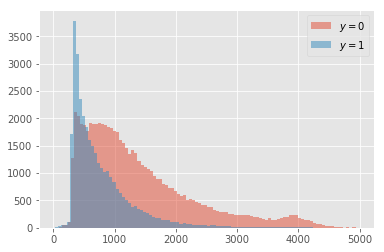

In [26]:
max_body_length = 5_000

bins=100
alpha=0.5

plt.hist(body_len_0[body_len_0 <= max_body_length], alpha=alpha, bins=bins, label=r'$y = 0$')
plt.hist(body_len_1[body_len_1 <= max_body_length], alpha=alpha, bins=bins, label=r'$y = 1$')
plt.legend();

отличаются ли медианы распределений?

In [27]:
np.median(body_len_0), np.median(body_len_1)

(1139.0, 615.0)

### Отличается ли распределение количества восклицательных знаков?

In [28]:
body_exclamation_0 = df[df.y == 0].body.str.count('!')
body_exclamation_1 = df[df.y == 1].body.str.count('!')

title_exclamation_0 = df[df.y == 0].title.str.count('!')
title_exclamation_1 = df[df.y == 1].title.str.count('!')

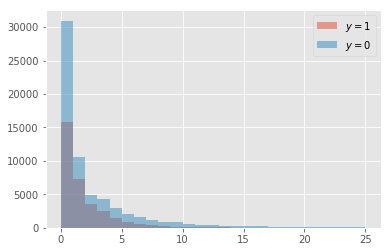

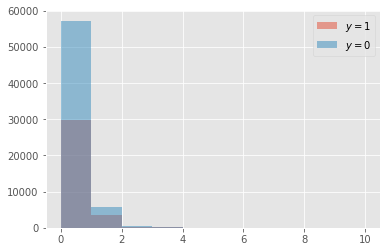

In [29]:
max_symbols = 25
title_max_symbols = 10

plt.hist(
    body_exclamation_1[body_exclamation_1 <= max_symbols],
    label=r'$y = 1$', bins=max_symbols, alpha=alpha
)
plt.hist(
    body_exclamation_0[body_exclamation_0 <= max_symbols],
    label=r'$y = 0$', bins=max_symbols, alpha=alpha
)
plt.legend()
plt.show()

plt.hist(
    title_exclamation_1[title_exclamation_1 <= title_max_symbols],
    label=r'$y = 1$', bins=title_max_symbols, alpha=alpha
)
plt.hist(
    title_exclamation_0[title_exclamation_0 <= title_max_symbols],
    label=r'$y = 0$', bins=title_max_symbols, alpha=alpha
)
plt.legend()
plt.show()

In [30]:
np.median(body_exclamation_0), np.median(body_exclamation_1)

(1.0, 1.0)

# Бейзлайн модель классификации

In [31]:
df['body_len'] = df.body.str.len()
df['title_len'] = df.title.str.len()
df['body_!'] = df.body.str.count('!')
df['title_!'] = df.title.str.count('!')

baseline_features = ['body_len', 'title_len', 'body_!', 'title_!']

In [33]:
df.head()

,body,title,rating,date,bank_name,y,body_len,title_len,body_!,title_!
0,Пользуюсь услугами банка около 4х лет.&amp;amp...,Очень эффективный банк,5,2020-10-02,Альфа-Банк,1,522,22,1,0
1,Несколько лет назад открыл кредитную карту в П...,Бешеные комиссии в Почта банке,1,2020-10-02,Почта Банк,0,1067,30,0,0
2,Решил закрыть карту этого банка. Через чат поп...,Ужасное обслуживание. Пустили по кругу,1,2020-10-02,Хоум Кредит Банк,0,725,38,0,0
3,"В марте 2020 года я потеряла работу , В конце ...",Сотрудники Сбербанка намерено меня обманули !!!!,1,2020-10-02,СберБанк,0,1332,48,1,4
4,"закончился вклад-депозит. во-первых, клиентски...",невозможно забрать свои же деньги,1,2020-10-02,Банк Открытие,0,1352,33,4,0


In [32]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=SEED)

In [34]:
x_train = df_train[baseline_features].values
y_train = df_train.y.values

x_val = df_val[baseline_features].values
y_val = df_val.y.values

In [35]:
baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=SEED, solver='lbfgs', class_weight='balanced'))
]).fit(x_train, y_train)

In [36]:
y_train_pred = baseline.predict(x_train)
f1_score(y_train, y_train_pred)

0.6093195321550016

In [37]:
y_val_pred = baseline.predict(x_val)
f1_score(y_val, y_val_pred)

0.6072228025667811

оцените важность признаков. проинтерпретируйте полученный результат

In [41]:
baseline_clf = baseline.steps[1][1]

In [44]:
baseline_features

['body_len', 'title_len', 'body_!', 'title_!']

In [42]:
baseline_clf.coef_

array([[-0.88704976, -0.55717545, -0.10380512,  0.08840598]])

In [43]:
baseline_clf.intercept_

array([-0.2349461])

# Обработка текста

## Модель на словах. CountVectorizer

In [45]:
stop_words = nltk.corpus.stopwords.words('russian')

In [46]:
count_model = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 1), token_pattern="[а-яё]+",
            stop_words=stop_words, min_df=3, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='log', class_weight='balanced'))
])

In [47]:
x_train = df_train['body'].values
x_val = df_val['body'].values

In [48]:
count_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так',...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                  

In [49]:
vectorizer = count_model.steps[0][1]

In [58]:
features = np.array(vectorizer.get_feature_names())

len(features)

57529

In [57]:
count_features = vectorizer.transform(x_train[[0]]).toarray()[0]

In [61]:
pd.DataFrame({
    'token': features[count_features > 0], 
    'count':count_features[count_features > 0]
})

,token,count
0,александр,1
1,банк,2
2,банке,2
3,банком,1
4,бизнесе,1
...,...,...
59,хочу,1
60,человека,1
61,шучу,1
62,экзамен,1


In [62]:
f1_score(y_train, count_model.predict(x_train))

0.9819575060954372

In [63]:
f1_score(y_val, count_model.predict(x_val))

0.9285451873622336

In [64]:
tree_model = Pipeline([
    (
        'vectorizer',
        CountVectorizer(
            lowercase=True, ngram_range=(1, 1), token_pattern="[а-яё]+",
            stop_words=stop_words, min_df=3, max_df=0.8
        )
    ),
    ('clf', DecisionTreeClassifier(random_state=SEED, criterion='entropy', max_depth=100))
])

обучите деревянную модель. сравните качество на тренировочном и валидационном наборах

In [65]:
tree_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так',...
                                 strip_accents=None, token_pattern='[а-яё]+',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=1

In [66]:
f1_score(
    y_train,
    tree_model.predict(x_train)
)

0.993590496090907

In [67]:
f1_score(
    y_val,
    tree_model.predict(x_val)
)

0.8291911011821651

In [68]:
clf = tree_model.steps[1][1]

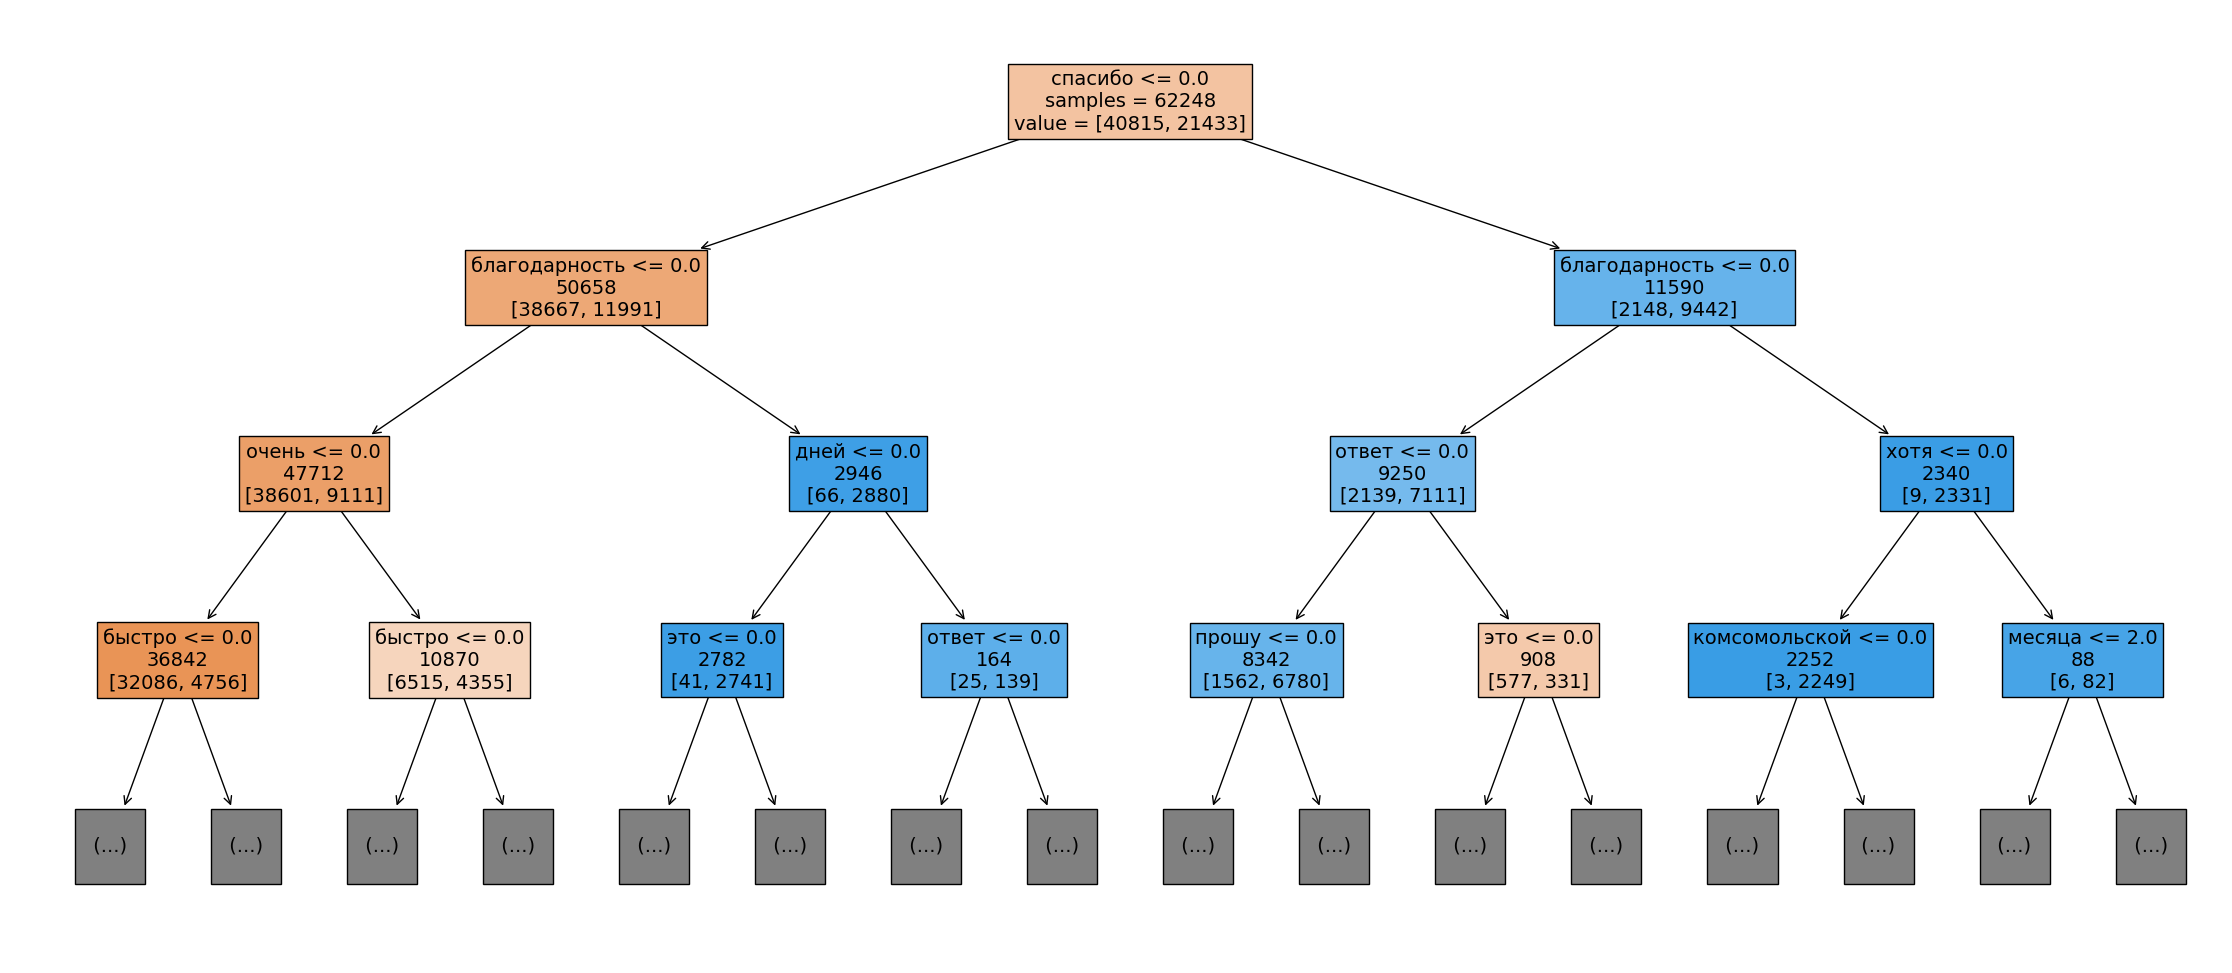

In [69]:
plt.style.use('default')
plt.figure(figsize=(28,12))
plot_tree(
    clf, max_depth=3, fontsize=14, filled=True, precision=0, label='root',
    impurity=False, feature_names=tree_model.steps[0][1].get_feature_names()
);

In [70]:
plt.style.use('ggplot')

## Модель на n-gram'ах символов. TfidfVectorizer

In [71]:
def preprocessor(text):
    whitespaced_text = re.sub("[^а-яё!:)(]", ' ', text.lower())
    return re.sub(' +', ' ',  whitespaced_text)

In [72]:
char_tfidf_model = Pipeline([
    (
        'vectorizer',
        TfidfVectorizer(
            lowercase=True, ngram_range=(2, 4), analyzer='char',
            preprocessor=preprocessor, min_df=5, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='log', class_weight='balanced'))
])

In [73]:
char_tfidf_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(2, 4), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f8c37a3c0d0>,
                                 smooth_idf=True, stop_words=None,
                                 strip_accents=...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='log', max_iter

In [74]:
len(char_tfidf_model.steps[0][1].get_feature_names())

76523

In [75]:
weights = char_tfidf_model.steps[1][1].coef_[0]

In [76]:
feature_names = np.array(
    char_tfidf_model.steps[0][1].get_feature_names()
)

In [77]:
order = weights.argsort()

In [78]:
feature_names[order][-20:]

array(['быс', ' быс', ' вс', 'чень', 'вс', 'бла', 'пас', 'дар', 'аго',
       'благ', 'лаго', 'агод', ' спа', 'одар', 'спа', 'сиб', 'паси',
       'сибо', 'асиб', 'спас'], dtype='<U4')

In [79]:
f1_score(y_train, char_tfidf_model.predict(x_train))

0.940132406330826

In [80]:
f1_score(y_val, char_tfidf_model.predict(x_val))

0.9343673160582562

## Подбор параметров с помощью кросс-валидации

In [ ]:
parameters = {
    'vectorizer__max_df': (0.5, 0.75),
    'vectorizer__min_df': (3, 5, 7),
    'clf__alpha': (0.0001, 0.001, 0.01),
}

In [ ]:
grid_search = GridSearchCV(count_model, parameters, cv=3, n_jobs=-1, scoring='f1', verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
best_parameters = grid_search.best_estimator_.get_params()

In [ ]:
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
mean_score = grid_search.cv_results_['mean_test_score']
std_score = grid_search.cv_results_['std_test_score']
x = np.arange(0, mean_score.size)

plt.errorbar(x, mean_score, yerr=std_score);

In [ ]:
grid_search.cv_results_

In [ ]:
cv_tuned_pipeline = grid_search.best_estimator_

In [ ]:
f1_score(
    y_train,
    cv_tuned_pipeline.predict(x_train)
)

In [ ]:
f1_score(
    y_val,
    cv_tuned_pipeline.predict(x_val)
)

## Объединение признаков

In [81]:
from sklearn.base import TransformerMixin


class ColumnExtractor(TransformerMixin):
    
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.column_name].values

In [82]:
title_extractor = ColumnExtractor(column_name='title')

In [83]:
title_extractor.fit(df_train)

In [84]:
title_extractor.transform(df_train)

array(['Положительное решение: быстро и понятно',
       'Благодарность сотрудникам операционного офиса 26/02 г. Ставрополь ул. 50 лет ВЛКСМ, д. 62/1',
       'Отказ в Кредитных каникулах', ...,
       'Обман на 60000р от сберегательного страхования',
       'Невыполнение условий услуги', 'Обман по процентам'], dtype=object)

In [85]:
pipeline = Pipeline([
    (
        'features', 
        FeatureUnion([
            (
                'title', 
                Pipeline([
                    ('extractor', ColumnExtractor('title')),
                    (
                        'vectorizer', 
                        TfidfVectorizer(
                            lowercase=True, ngram_range=(1, 2), token_pattern="[а-яё]+",
                            stop_words=stop_words, min_df=5, max_df=0.75
                        )
                    )
                ])
            ),
            (
                'body',
                Pipeline([
                    ('extractor', ColumnExtractor('body')),
                    (
                        'vectorizer', 
                        CountVectorizer(
                            lowercase=True, ngram_range=(1, 1), token_pattern="[а-яё]+",
                            stop_words=stop_words, min_df=3, max_df=0.75
                        )
                    )
                ])
            )
        ])
    ),
    ('clf', SGDClassifier(random_state=SEED, alpha=0.001, class_weight='balanced'))
])

In [86]:
pipeline.fit(df_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('title',
                                                 Pipeline(memory=None,
                                                          steps=[('extractor',
                                                                  <__main__.ColumnExtractor object at 0x7f8c367dd8d0>),
                                                                 ('vectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  enc

In [87]:
f1_score(
    y_train,
    pipeline.predict(df_train)
)

0.9730671437988511

In [88]:
f1_score(
    y_val,
    pipeline.predict(df_val)
)

0.9445434925401145

получите признаки из векторизатора. посмотрите на добавленные биграммы

## Визуализация отзывов

Мы обучали модель классификации с помощью бинарной кросс-энтропии (log_loss):
$$
L = - y \log\left(\hat{y}\right) - (1 - y) \log\left(1 - \hat{y}\right)
$$

первое слагаемое в функции потерь отвечает за ложно-положительные срабатывания, второе — за ложно-отрицательные

посмотрим, на каких примерах полученная модель сильнее всего ошибается в одну и другую сторону

In [89]:
y_val_proba = count_model.predict_proba(x_val)[:, 1]

y_val_rating = df_val.reset_index().rating.values

In [90]:
def false_positive(y, y_proba, eps=1e-15):
    if y:
        return (-y) * np.log(y_proba + eps)
    else:
        return 0.0

def false_negative(y, y_proba, eps=1e-15):
    if y:
        return 0.0
    else:
        return (y - 1) * np.log(1 - y_proba + eps)


review_count = 5


positive_error = np.array([false_positive(y, y_proba) for (y, y_proba) in zip(y_val, y_val_proba)])

negative_error = np.array([false_negative(y, y_proba) for (y, y_proba) in zip(y_val, y_val_proba)])

max_loss_ids = np.concatenate((
    positive_error.argsort()[::-1][:review_count],
    negative_error.argsort()[::-1][:review_count]
))

In [91]:
vectorizer = count_model.steps[0][1]

token2id = {token: i for i, token in enumerate(vectorizer.get_feature_names())}

importance = count_model.steps[1][1].coef_[0]

min_importance = importance.min()
max_importance = importance.max()

In [92]:
for i in max_loss_ids:
    review_body = x_val[i]
    
    print(f'rating: {y_val_rating[i]}')
    print(f'predicted proba: {y_val_proba[i]}')
    
    review_tokens = re.findall("[а-яё]+", review_body.lower())
    
    html_string = '''
    <p style="font-size:16px; color:#000000; border: 2px solid #000; text-align: justify; background-color:#ffffff; border-radius: 25px; padding: 20px;">
    '''

    for token in review_tokens:
        if token in token2id:
            weight = importance[token2id[token]]
            if weight < 0:
                component = hex(int(255 - 255 * weight / min_importance))[2:]
                color = f'{component}{component}ff'
            else:
                component = hex(int(255 - 255 * weight / max_importance))[2:]
                color = f'ff{component}{component}'
        else:
            weight = 0.0
            color = 'ffffff'
        html_string += f'<span style="background-color: #{color}"; title="{weight:.2f}">{token}</span> '

    html_string += '</p>'

    display(HTML(html_string))

rating: 4
predicted proba: 4.745687182661529e-09


rating: 4
predicted proba: 1.189082902590843e-07


rating: 4
predicted proba: 2.7530809319218565e-07


rating: 5
predicted proba: 4.664807172574877e-07


rating: 5
predicted proba: 4.989628041081601e-07


rating: 2
predicted proba: 0.9999278858104866


rating: 2
predicted proba: 0.9998255569795984


rating: 2
predicted proba: 0.9995292980800682


rating: 1
predicted proba: 0.9963292779858967


rating: 1
predicted proba: 0.9962090332931175


если присмотреться, то ошибки модели связаны с ошибками в разметке

# Проблемы анализа тональности

это двойные отрицания и сарказм

In [93]:
count_model.predict_proba(['ну да, блин, отношение к клиентам супер, спасибо вам...'])

array([[0.16703649, 0.83296351]])

In [94]:
count_model.predict_proba(['такой клиентоориентированности я еще не видел, сказочные ...'])

array([[0.39937077, 0.60062923]])

In [95]:
count_model.predict_proba(['выражаю огромную благодарность банку, третий раз пытаюсь оформить доставку карты, но воз и ныне там'])

array([[0.18310421, 0.81689579]])

In [96]:
count_model.predict_proba(['я думал, что банк окажется хуже некуда, но обошлось'])

array([[0.64021328, 0.35978672]])

In [97]:
count_model.predict_proba(['раньше ненавидел сбербанк, а теперь всем советую'])

array([[0.59755025, 0.40244975]])